In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

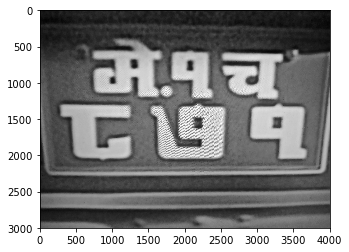

In [2]:
image = cv2.imread('../images/license2.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

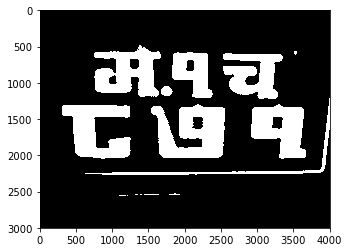

In [3]:
blurred = cv2.GaussianBlur(image,(5,5),0)
ret, thresh = cv2.threshold(blurred,160,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [4]:
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")

In [5]:
image.shape

(3000, 4000)

In [6]:
total_pixels = image.shape[0] * image.shape[1]
lower = total_pixels // 70
upper = total_pixels // 20

In [7]:
# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # If this is the background label, ignore it
    if label == 0:
        continue
 
    # Otherwise, construct the label mask to display only connected component
    # for the current label
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
 
    # If the number of pixels in the component is between lower bound and upper bound, 
    # add it to our mask
    if numPixels > lower and numPixels < upper:
        mask = cv2.add(mask, labelMask)

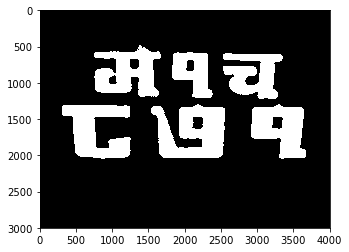

In [8]:
plt.imshow(mask,cmap='gray')

In [9]:
# Find contours and get bounding box for each contour
image, contours, hierarchy= cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in contours]

In [10]:
import functools

In [11]:
# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

In [12]:
boundingBoxes

[(744, 474, 925, 719),
 (1819, 575, 562, 639),
 (2520, 596, 826, 626),
 (1533, 1292, 1023, 751),
 (2906, 1296, 768, 749),
 (299, 1308, 952, 741)]

In [20]:
test = cv2.imread('../images/license2.jpg')

In [49]:
for bbox in boundingBoxes:
    x, y, w, h = bbox
    cv2.rectangle(mask, (x, y), (x + w, y + h), (0, 0, 255), 40)

numpy.ndarray

In [54]:
# Resize the image to fit within your screen resolution
scale_percent = 30  # Adjust as needed
width = int(mask.shape[1] * scale_percent / 100)
height = int(mask.shape[0] * scale_percent / 100)
dim = (width, height)
mask_image_resized = cv2.resize(mask, dim, interpolation=cv2.INTER_AREA)

In [55]:
cv2.imwrite('final_image.png', mask_image_resized)

True

In [56]:
while True:
    cv2.imshow('mask',mask_image_resized)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cv2.destroyAllWindows()